In [71]:
import numpy as np
import pandas as pd
import math
import random
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomFlip
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D, Dropout, Add
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [72]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [73]:
# Determine shape of the data
img_width, img_height, img_num_channels = 32, 32, 3
no_classes = 100
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = X_train.astype('float32')
input_test = X_test.astype('float32')

# Normalize data
input_train = input_train / 255.0
input_test = input_test / 255.0

target_train = y_train
target_test = y_test

In [74]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(no_classes, activation='softmax'))
# model.summary()

In [120]:
# Create the model
def createModel(input_shape):
    random.seed(42)
    model = Sequential()
    model.add(RandomFlip('horizontal',input_shape=input_shape))
#     model.add(RandomRotation(0.2, input_shape=input_shape))
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(BatchNormalization())

#     model.add(Dense(2048, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(no_classes, activation='softmax'))
    model.summary()
    return model

In [115]:
def cnn(model, optimizer=Adam(), batch_size=50, no_epochs=100):
    loss_function = sparse_categorical_crossentropy
    validation_split = 0.2
    verbosity = 1
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    # Compile the model
    model.compile(loss=loss_function,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Fit data to model
    history = model.fit(input_train, target_train,
                batch_size=batch_size,
                epochs=no_epochs,
                verbose=verbosity,
                validation_split=validation_split,
                callbacks=[callback])
    return model, history

In [121]:
random.seed(42)
batch_size = 64
no_epochs = 100
optimizer = Adam()

# Model configuration
model = createModel(input_shape)
model, history = cnn(model, optimizer, batch_size, no_epochs)


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_45 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_106 (Bat (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_107 (Bat (None, 8, 8, 64)        

Test loss: 2.0524487495422363 / Test accuracy: 0.49810001254081726


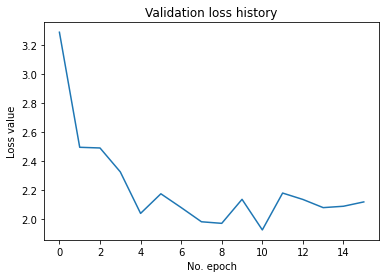

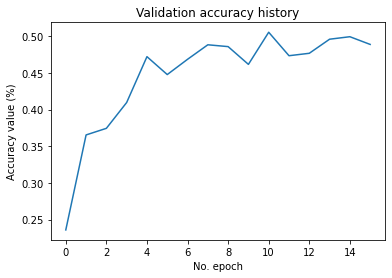

In [122]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_42 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_139 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 8, 8, 64)        

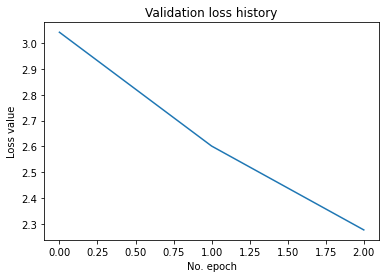

Test loss: 2.2486114501953125 / Test accuracy: 0.4133000075817108


In [114]:
random.seed(42)
batch_size = 64
no_epochs = 10
optimizer = Adam()

# Model configuration
model = createModel(input_shape)
model, history = cnn(model, optimizer, batch_size, no_epochs)

# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')